In [ ]:
# import libraries 
import numpy as np 
import pandas as pd
import nltk 
from nltk.corpus import stopwords 
import string 

In [ ]:
# load the data
df = pd.read_csv('Spam_sms.csv',encoding='latin-1')
# print the first 5 rows ò data
df.head(5)

,v1,v2
0,spam,"Hey dude, let's grab some lunch together soon!"
1,ham,What have you been up to lately?
2,ham,Just wanted to send some positive vibes your w...
3,spam,You've been chosen to receive a free home secu...
4,ham,Keep pushing towards your goals!


In [ ]:
df=df.rename(columns={"v1":"label","v2":"text"})
df.head()

,label,text
0,spam,"Hey dude, let's grab some lunch together soon!"
1,ham,What have you been up to lately?
2,ham,Just wanted to send some positive vibes your w...
3,spam,You've been chosen to receive a free home secu...
4,ham,Keep pushing towards your goals!


In [ ]:
# print the shape (number of rows and columns)
df.shape

(1112, 2)

In [ ]:
# Get the columns names 
df.columns 

Index(['label', 'text'], dtype='object')

In [ ]:
# check for duplicaté and remove them 
df.drop_duplicates(inplace=True)


In [ ]:
#show the new shape (number of rows and columns )
df.shape

(1098, 2)

In [ ]:
df.label.value_counts()

spam    560
ham     538
Name: label, dtype: int64

In [ ]:
df.describe()

,label,text
count,1098,1098
unique,2,1098
top,spam,"Hey dude, let's grab some lunch together soon!"
freq,560,1


In [ ]:
df['length']=df['text'].apply(len)
df.head()

,label,text,length
0,spam,"Hey dude, let's grab some lunch together soon!",46
1,ham,What have you been up to lately?,32
2,ham,Just wanted to send some positive vibes your w...,55
3,spam,You've been chosen to receive a free home secu...,111
4,ham,Keep pushing towards your goals!,32


<Axes: ylabel='Frequency'>

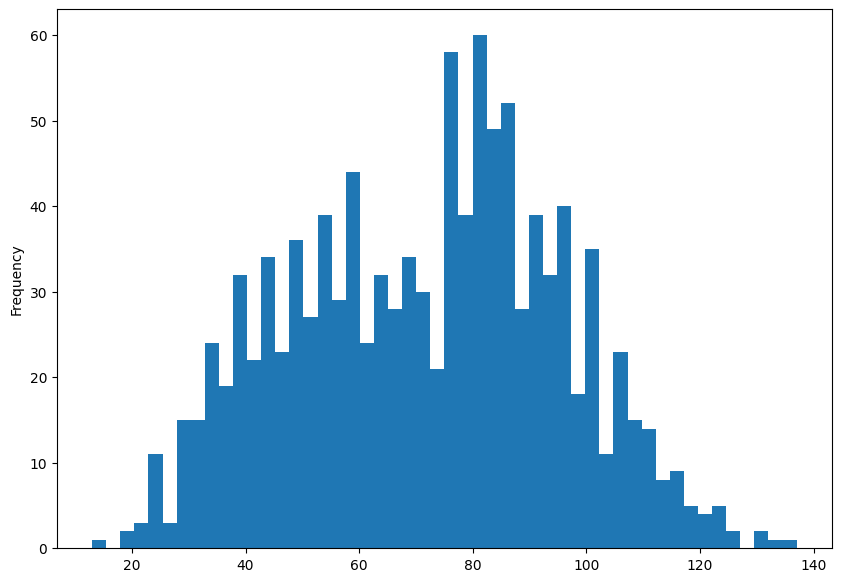

In [ ]:
# Plot the histogram - the length of message 
import matplotlib.pyplot as plt
import seaborn as sns

df['length'].plot(bins=50, kind='hist',figsize=(10,7))

In [ ]:
df.loc[:,'label']=df.label.map({'ham':0, 'spam':1})
df.head()

<ipython-input-12-d859e8398aa2>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,'label']=df.label.map({'ham':0, 'spam':1})


,label,text,length
0,1,"Hey dude, let's grab some lunch together soon!",46
1,0,What have you been up to lately?,32
2,0,Just wanted to send some positive vibes your w...,55
3,1,You've been chosen to receive a free home secu...,111
4,0,Keep pushing towards your goals!,32


In [ ]:
# show the number of missing data for each column
df.isnull().sum()

label     0
text      0
length    0
dtype: int64

In [ ]:
# dowload the stopwords package 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def process_text(text):
 #1 remove punctuatuon
 #2 remove stopwords 
 #3 return a list of clean text words 

 #1 
 nopunc = [char for char in text if char not in string.punctuation]
 nopunc = ''.join(nopunc)
 #2
 clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')] 
 #3 
 return clean_words

In [ ]:
# show tokenization (a list of tokens also lemma  )
df['text'].head().apply(process_text)

0       [Hey, dude, lets, grab, lunch, together, soon]
1                                             [lately]
2          [wanted, send, positive, vibes, way, today]
3    [Youve, chosen, receive, free, home, security,...
4                      [Keep, pushing, towards, goals]
Name: text, dtype: object

In [ ]:
# convert a collection of text to a matriz token 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer=process_text)
message_bow = cv.fit_transform(df['text'])

In [ ]:
# split data into 80% training and 20% testing 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(message_bow,df['label'],test_size = 0.20,random_state=0)   

In [ ]:
# get the shape of messgae_bow
message_bow.shape

(1098, 1801)

In [ ]:
# Creat and train the Naive Bayes Classifier 
from sklearn.naive_bayes import MultinomialNB 
model = MultinomialNB()
classifier = model.fit(X_train,y_train)

In [ ]:
#print the prediction 
print(classifier.predict(X_train))
# print the actual values
print(y_train.values)

[0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 1
 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0
 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0
 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1
 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0
 0 0 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1
 1 0 0 0 1 1 1 1 0 0 0 0 

In [ ]:
# evaluate the model on training dataset 
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score 
pred = classifier.predict(X_train)
print(classification_report(y_train,pred))
print()
print('Confusion Matrix : \n',confusion_matrix(y_train,pred))
print()
print('Accuracy:',accuracy_score(y_train,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       436
           1       0.99      0.98      0.98       442

    accuracy                           0.98       878
   macro avg       0.98      0.98      0.98       878
weighted avg       0.98      0.98      0.98       878


Confusion Matrix : 
 [[431   5]
 [ 10 432]]

Accuracy: 0.9829157175398633


In [ ]:
#print the prediction 
print(classifier.predict(X_test))
# print the actual values
print(y_test.values)

[0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1
 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]
[0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1
 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0]


In [ ]:
# evaluate the model on testing dataset 
from sklearn.metrics import classification_report , confusion_matrix ,accuracy_score ,precision_recall_fscore_support
pred = classifier.predict(X_test)
print(classification_report(y_test,pred))
print()
print('Confusion Matrix : \n',confusion_matrix(y_test,pred))
print()
print('Accuracy:',accuracy_score(y_test,pred))
print()
# calculating the Recall and F1 score  
precision, recall, f1,_  = precision_recall_fscore_support(y_test,pred, average='binary',pos_label=1) 
# In ra kết quả
print("Độ phủ (Recall):", recall)
print("Độ F1 (F1 score):", f1)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       118

    accuracy                           0.98       220
   macro avg       0.98      0.98      0.98       220
weighted avg       0.98      0.98      0.98       220


Confusion Matrix : 
 [[101   1]
 [  3 115]]

Accuracy: 0.9818181818181818

Độ phủ (Recall): 0.9745762711864406
Độ F1 (F1 score): 0.982905982905983


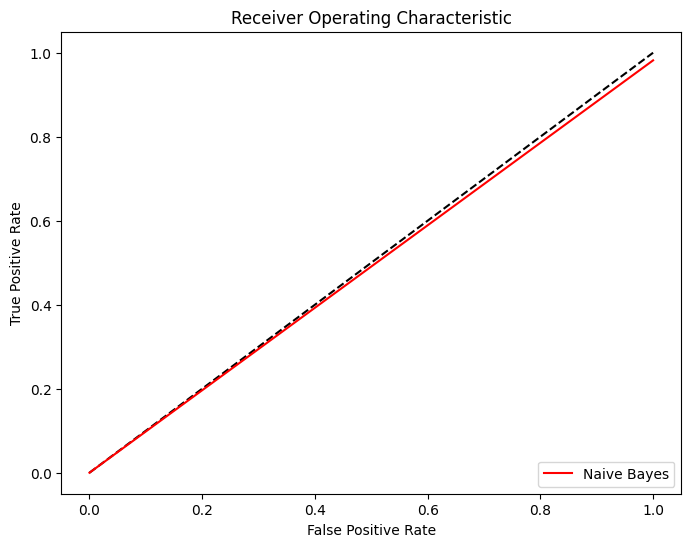

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')  # Đường chéo
plt.plot([0, 1], [0, accuracy_score(y_test,pred)], 'r-', label='Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# save model and Countvectorizer 
import pickle
# Save the vectorizer
vec_file = 'vectorizer.pkl'
pickle.dump(cv, open(vec_file, 'wb'))
# Save the model
mod_file = 'classification.pkl'
pickle.dump(classifier, open(mod_file, 'wb'))